In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 44.5MB/s]
 95% 258M/271M [00:05<00:00, 49.5MB/s]
100% 271M/271M [00:05<00:00, 56.0MB/s]
 96% 522M/544M [00:08<00:00, 62.0MB/s]
100% 544M/544M [00:08<00:00, 64.9MB/s]


/bin/bash: line 0: help: no help topics match `python'.  Try `help help' or `man -k python' or `info python'.


In [0]:
!unzip test.zip 
!unzip train.zip
!rm test.zip
!rm train.zip


### **Training[PART 1] custom made Model**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.utils import np_utils



In [0]:
from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, RMSprop, Adam
from keras import backend as k
k.tensorflow_backend.set_image_dim_ordering('th')
import pandas as pd
import tensorflow as tf
import datetime

# **Making dataset from every image**

In [0]:
pth = '/content/train/'
Y = []
X = []
imgdim = 100 #dimention of images

for im in os.listdir(pth):
  # print(im)
  tmpTitl = im.split('.')[0]
  if tmpTitl =='cat':
    Y.append(0) #if cat the 0
  else:
    Y.append(1) #if dog the 1

  utri = cv2.imread(str('/content/train/'+im), cv2.IMREAD_GRAYSCALE)
  utri = cv2.resize(utri,(imgdim,imgdim))
  utri = np.reshape(utri,(1,imgdim,imgdim))
  utri = utri/255 
  X.append(utri)

X = np.array(X)
Y = np.array(Y)
Y = np_utils.to_categorical(Y)
# print(X[:10])
X.shape


(25000, 1, 100, 100)

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)


In [0]:
# pth = '/content/train/cat.11442.jpg'
# im = cv2.imread(pth, cv2.IMREAD_GRAYSCALE)
# plt.imshow(im, cmap='gray')
# plt.show()


In [0]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# img = load_img('/content/train/cat.11442.jpg', grayscale= True) 
# x = img_to_array(img)  
# x = x.reshape((1,) + x.shape)

# x.shape

In [0]:
# imgdim = 70
# utri = cv2.imread('/content/train/dog.5715.jpg', cv2.IMREAD_GRAYSCALE)
# print(utri.shape)
# utri = cv2.resize(utri,(imgdim,imgdim))
# print(utri.shape)
# utri = np.reshape(utri,(1,imgdim,imgdim))
# print(utri.shape)
# # plt.imshow(utri, cmap='gray')
# # plt.show()

# # utri = np.reshape(utri,(imgdim**2))
# utri/255

In [0]:
EPOCH = 10
BATCH_SIZE = 200
VERBOSE = 1
N_CLASSES = 2
# OPTIMIZER = SGD(lr=0.001)
# OPTIMIZER = RMSprop()
OPTIMIZER = Adam(lr=0.001)
N_HIDDEN = 128
VALIDATION_SPLIT = 0.15
DROPOUT = 0.2

In [0]:
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [0]:
def baseline_model():
  #create model
  model = Sequential()
  model.add(Conv2D(32,(5,5), input_shape= (1,imgdim,imgdim), activation= 'relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(DROPOUT))
  model.add(Flatten())

  model.add(Dense(N_HIDDEN, activation='relu'))

  model.add(Dense(N_CLASSES, activation='softmax'))

  #compile model
  model.compile(loss= 'categorical_crossentropy', optimizer = OPTIMIZER, metrics=['accuracy'])
  return model


In [0]:
def dynamic_model(convNum, convLayer, denseLayer):
  #create model
  model = Sequential()

  for i in range(convLayer):
    model.add(Conv2D(convNum,(3,3), input_shape= (1,imgdim,imgdim), activation= 'relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(DROPOUT))

  model.add(Flatten())

  for j in range(denseLayer):
    model.add(Dense(N_HIDDEN, activation='relu'))
    model.add(Dropout(DROPOUT))

  model.add(Dense(N_CLASSES, activation='softmax'))



  #compile model
  model.compile(loss= 'categorical_crossentropy', optimizer = OPTIMIZER, metrics=['accuracy'])
  return model


In [0]:
# model = baseline_model()
# model.summary()

convLayer = [2]
denseLayer = [1]
convNum=[32]

for cn in convNum:
  for cl in convLayer:
    for dl in denseLayer:
        NAME="logs/fit/{}-convNum-{}-convLayer-{}-denseLayer".format(cn,cl,dl,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=NAME)
        print('***RUNNING...{}***'.format(NAME))  

        model = dynamic_model(convLayer=cl, denseLayer=dl,convNum=cn)
        model.fit(X, Y, validation_split=0.1 , epochs=EPOCH, batch_size= BATCH_SIZE, callbacks=[tensorboard_callback], verbose=1)




***RUNNING...logs/fit/32-convNum-2-convLayer-1-denseLayer***
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 4s 196us/step - loss: 0.7112 - acc: 0.5559 - val_loss: 0.6740 - val_acc: 0.5824
Epoch 2/10
22500/22500 [==============================] - 4s 168us/step - loss: 0.6425 - acc: 0.6299 - val_loss: 0.6236 - val_acc: 0.6676
Epoch 3/10
22500/22500 [==============================] - 4s 171us/step - loss: 0.5957 - acc: 0.6823 - val_loss: 0.5898 - val_acc: 0.7112
Epoch 4/10
22500/22500 [==============================] - 4s 169us/step - loss: 0.5400 - acc: 0.7289 - val_loss: 0.5197 - val_acc: 0.7404
Epoch 5/10
22500/22500 [==============================] - 4s 169us/step - loss: 0.5038 - acc: 0.7543 - val_loss: 0.4851 - val_acc: 0.7708
Epoch 6/10
22500/22500 [==============================] - 4s 169us/step - loss: 0.4704 - acc: 0.7770 - val_loss: 0.4803 - val_acc: 0.7752
Epoch 7/10
22500/22500 [==============================] - 4s 1

In [0]:
# model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=EPOCH, batch_size= BATCH_SIZE, verbose=1)

# model.fit(X, Y, validation_split=0.1 , epochs=EPOCH, batch_size= BATCH_SIZE, callbacks=[tensorboard_callback], verbose=1)

In [0]:
!zip -r /content/tensorboard_3.zip /content/logs
!cp tensorboard_3.zip /content/drive/My\ Drive/Colab\ Notebooks/

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# import tensorflow as tf
# from tensorflow.python.client import device_lib

# print(tf.test.is_gpu_available())
# print(tf.test.gpu_device_name())

# def get_available_gpus():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos if x.device_type.endswith('GPU')]

# get_available_gpus()


## **things Left to do **
*   use tensorflow backend
*   change optimizer





### **Training[PART 2] Using pre-trained Model**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.utils import np_utils
import pandas as pd




Using TensorFlow backend.


In [0]:
# from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, RMSprop, Adam
from keras import backend as k
k.tensorflow_backend.set_image_dim_ordering('tf')
from keras.applications import vgg16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D


In [0]:
## Creating dataset for acording to tensorflow image dimension
pth = '/content/train/'
Y = []
X = []
imgdim = 100 #dimention of images

for im in os.listdir(pth):
  # print(im)
  tmpTitl = im.split('.')[0]
  if tmpTitl =='cat':
    Y.append(0.0) #if cat the 0
  else:
    Y.append(1.0) #if dog the 1

  utri = cv2.imread(str('/content/train/'+im), cv2.IMREAD_COLOR)
  utri = cv2.resize(utri,(imgdim,imgdim))
  utri = np.reshape(utri,(imgdim,imgdim,3))
  utri = utri/255 
  X.append(utri)

X = np.array(X)
Y = np.array(Y)
Y = np_utils.to_categorical(Y)
# print(X[:10])
print('complete...')
X.shape


complete...


(25000, 100, 100, 3)

In [0]:
EPOCH = 5
BATCH_SIZE = 200
VERBOSE = 1
N_CLASSES = 2
# OPTIMIZER = SGD(lr=0.001)
# OPTIMIZER = RMSprop()
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.15
DROPOUT = 0.2

In [0]:
base_model = vgg16.VGG16(include_top=False, weights= 'imagenet' )
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
preds = Dense(N_CLASSES, activation='softmax')(x)
model = Model(inputs = base_model.inputs, outputs = preds)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
for layer in model.layers[:20]:
  layer.trainable = False
for layer in model.layers[20:]:
  layer.trainable = True

model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X, Y, validation_split=0.1 , epochs=EPOCH, batch_size= BATCH_SIZE, verbose=1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 16s 712us/step - loss: 0.3802 - acc: 0.8226 - val_loss: 0.3682 - val_acc: 0.8264
Epoch 2/5
22500/22500 [==============================] - 16s 694us/step - loss: 0.3090 - acc: 0.8656 - val_loss: 0.3261 - val_acc: 0.8496
Epoch 3/5
22500/22500 [==============================] - 16s 693us/step - loss: 0.2907 - acc: 0.8720 - val_loss: 0.3095 - val_acc: 0.8648
Epoch 4/5
22500/22500 [==============================] - 16s 692us/step - loss: 0.2763 - acc: 0.8776 - val_loss: 0.3029 - val_acc: 0.8692
Epoch 5/5
22500/22500 [==============================] - 16s 691us/step - loss: 0.2664 - acc: 0.8831 - val_loss: 0.2997 - val_acc: 0.8704


In [0]:
ls test/

1
[5.5363594e-06 9.9999452e-01]


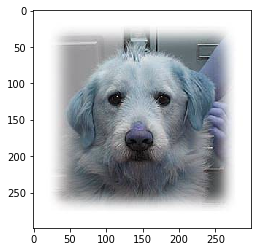

In [0]:
pth = '/content/test/3.jpg'
imgar= []
im = cv2.imread(pth)
temp = cv2.resize(im,(imgdim,imgdim), cv2.IMREAD_COLOR)
temp = temp.reshape(imgdim,imgdim,3)
temp = temp/255
imgar.append(temp)
imgar = np.array(imgar)

report = model.predict(imgar)[0]
print(np.argmax(report))
print(report)
plt.imshow(im, cmap='gray')
plt.show()

In [0]:
## Creating TEST dataset for acording to tensorflow image dimension

pth = '/content/test/'
ids = []
Y_predt = []
X_test = []



imgdim = 100 #dimention of images

for im in os.listdir(pth):
  # print(im)
  imgID = im.split('.')[0]

  im_test = cv2.imread(str('/content/test/'+im), cv2.IMREAD_COLOR)
  im_test = cv2.resize(im_test,(imgdim,imgdim))
  im_test = np.reshape(im_test,(imgdim,imgdim,3))
  im_test = im_test/255 
  X_test = [im_test]
  X_test = np.array(X_test)
  report = model.predict(x=X_test)

  ids.append(imgID)
  Y_predt.append(np.argmax(report[0]))

results = pd.DataFrame({'id':ids, 'label':Y_predt})

# results.sort_values(by='id')

In [0]:
# results = results.sort_values(by=['id'])
results.to_csv('results.csv', index=False)
results

,id,label
0,11086,0
1,860,0
2,8918,0
3,5848,0
4,11331,1
...,...,...
12495,2510,1
12496,10760,0
12497,4953,1
12498,7571,0
